# Fitting a Fermi distribution (transition line)

Load packages

In [1]:
import sys
import os
import numpy as np

import qcodes
import qcodes as qc
from qcodes.plots.pyqtgraph import QtPlot
from qcodes.plots.qcmatplotlib import MatPlot
import matplotlib.pyplot as plt
%matplotlib inline

import qtt
import qtt.qtt_toymodel
from qtt.algorithms.fitting import FermiLinear, fitFermiLinear
from qcodes.data.hdf5_format import HDF5Format

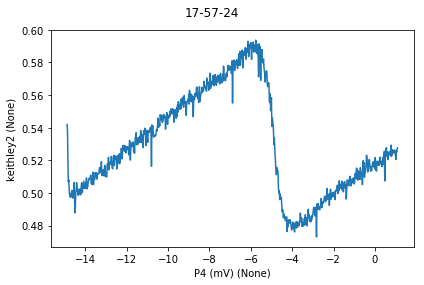

In [2]:
exampledatadir = os.path.join(qtt.__path__[0], '..', 'examples', 'data')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)

dataset = qcodes.load_data(os.path.join('17-57-24'))
MatPlot(dataset.default_parameter_array())

## Fit function to data

In [3]:
import scipy

y_array = dataset.default_parameter_array()
setarray = y_array.set_arrays[0]
xdata = np.array(setarray)
ydata = np.array(y_array)

# fit
pp = fitFermiLinear(xdata, ydata, verbose=1, fig=None)
p = pp[0]
p0 = pp[1]['p0']

y0 = FermiLinear(xdata, *list(p0))
y = FermiLinear(xdata, *list(p))

print('estimated temperature: %.1f mK' % (1e3 * p[4]))

[ 0.01000295  0.51806569 -4.88800525  0.12838861  0.25382811]
estimated temperature: 253.8 mK


## Show fit

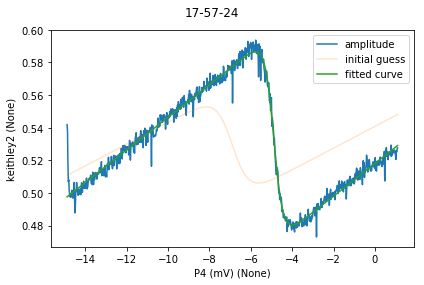

In [5]:
p = MatPlot(dataset.default_parameter_array())
v0 = qcodes.DataArray(name='initial', label='initial guess', preset_data=y0,  set_arrays=(setarray,))
p.add(v0, alpha=.2, label='initial guess')
v = qcodes.DataArray(name='fitted', label='fitted curve', preset_data=y,  set_arrays=(setarray,))
p.add(v, label='fitted curve')
plt.legend()